# NAS Ranking Distribution and SRCC

In [1]:
# import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import *
# import datetime
%load_ext autoreload
%autoreload 2
curr_dataset = 'ml-100k'

## user.enc+usr.emb

ranks.shape: (375, 9)
cf_emb_srcc: 0.289


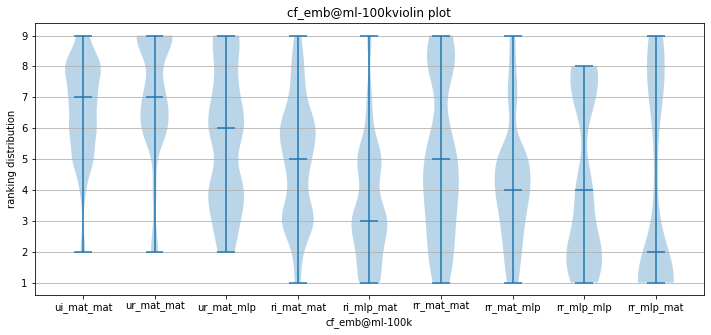

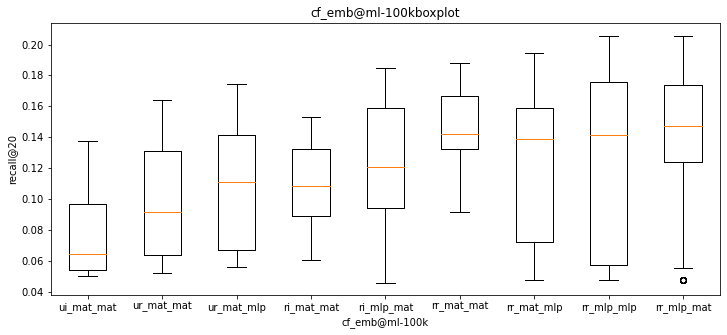

In [2]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE, CF_EMB_LIST
from controller import sample_arch_cf, sample_arch_cf_emb

curr_dataset = 'ml-100k'
data_type = 'implicit'
cf_emb_list0 = CF_EMB_LIST
cf_emb_dicts = dict()
cf_embgroups = [[] for item in cf_emb_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset+'_'+data_type +"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_cf_emb = sample_arch_cf_emb(cf_emb_list0[0])

for arch_cf in arch_cf_list_cf_emb:
    for cf_emb in cf_emb_list0:
        cf_emb_idx = cf_emb_list0.index(cf_emb)
        arch_cf['cf'], arch_cf['emb']['u'], arch_cf['emb']['i'] = cf_emb.split('_')
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        cf_embgroups[cf_emb_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
cf_embgroups = np.array(cf_embgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

cf_embgroups = cf_embgroups.reshape(len(cf_emb_list0),int(25*SPACE/len(cf_emb_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(cf_emb_list0)
cf_embgroups = cf_embgroups[:lr_hp_num,:]
cf_embranks = get_rank_from_score(groups=cf_embgroups[:lr_hp_num,:])
print("ranks.shape: {}".format(cf_embranks.shape))
cf_emb_srcc = get_srcc_from_rank(groups=cf_embgroups, ranks=cf_embranks, optslist=cf_emb_list0[:lr_hp_num])
print("cf_emb_srcc: {:.4}".format(cf_emb_srcc))


fig = violin_plot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
# plt.xticks(x, x, rotation=30)  # 这里是调节横坐标的倾斜度，rotation是度数
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_boxplot_'+curr_dataset)))



In [5]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE, CF_EMB_LIST
from controller import sample_arch_cf, sample_arch_cf_emb

curr_dataset = 'ml-1m'
data_type = 'implicit'
cf_emb_list0 = CF_EMB_LIST
cf_emb_dicts = dict()
cf_embgroups = [[] for item in cf_emb_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset+"_"+ data_type+"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_cf_emb = sample_arch_cf_emb(cf_emb_list0[0])

for arch_cf in arch_cf_list_cf_emb:
    for cf_emb in cf_emb_list0:
        cf_emb_idx = cf_emb_list0.index(cf_emb)
        arch_cf['cf'], arch_cf['emb']['u'], arch_cf['emb']['i'] = cf_emb.split('_')
        
        print(str(arch_cf))
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        cf_embgroups[cf_emb_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
cf_embgroups = np.array(cf_embgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

cf_embgroups = cf_embgroups.reshape(len(cf_emb_list0),int(25*SPACE/len(cf_emb_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(cf_emb_list0)
cf_embgroups = cf_embgroups[:lr_hp_num,:]
cf_embranks = get_rank_from_score(groups=cf_embgroups[:lr_hp_num,:])
print("ranks.shape: {}".format(cf_embranks.shape))
cf_emb_srcc = get_srcc_from_rank(groups=cf_embgroups, ranks=cf_embranks, optslist=cf_emb_list0[:lr_hp_num])
print("cf_emb_srcc: {:.4}".format(cf_emb_srcc))


fig = violin_plot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
# plt.xticks(x, x, rotation=30)  # 这里是调节横坐标的倾斜度，rotation是度数
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_boxplot_'+curr_dataset)))

FileNotFoundError: [Errno 2] No such file or directory: 'save/random_nas_ml-1m_implicit_perf_dict0.json'

ranks.shape: (375, 9)
cf_emb_srcc: 0.487


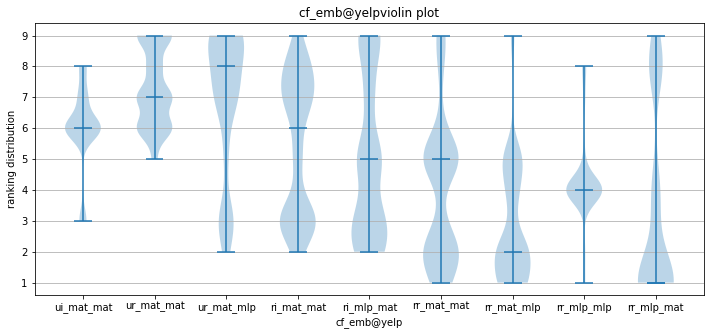

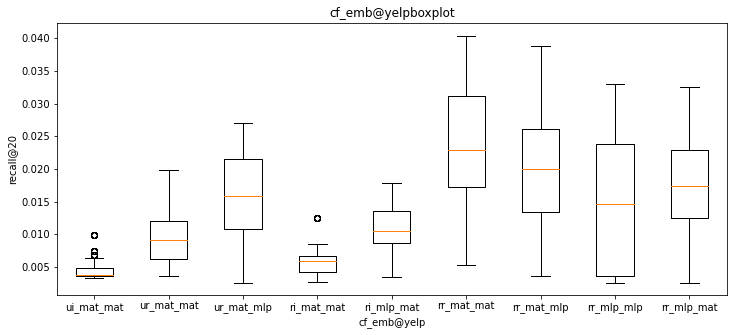

In [6]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE, CF_EMB_LIST
from controller import sample_arch_cf, sample_arch_cf_emb

curr_dataset = 'yelp'
data_type = 'implicit'
cf_emb_list0 = CF_EMB_LIST
cf_emb_dicts = dict()
cf_embgroups = [[] for item in cf_emb_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset +"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_cf_emb = sample_arch_cf_emb(cf_emb_list0[0])

for arch_cf in arch_cf_list_cf_emb:
    for cf_emb in cf_emb_list0:
        cf_emb_idx = cf_emb_list0.index(cf_emb)
        arch_cf['cf'], arch_cf['emb']['u'], arch_cf['emb']['i'] = cf_emb.split('_')
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        cf_embgroups[cf_emb_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
cf_embgroups = np.array(cf_embgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

cf_embgroups = cf_embgroups.reshape(len(cf_emb_list0),int(25*SPACE/len(cf_emb_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(cf_emb_list0)
cf_embgroups = cf_embgroups[:lr_hp_num,:]
cf_embranks = get_rank_from_score(groups=cf_embgroups[:lr_hp_num,:])
print("ranks.shape: {}".format(cf_embranks.shape))
cf_emb_srcc = get_srcc_from_rank(groups=cf_embgroups, ranks=cf_embranks, optslist=cf_emb_list0[:lr_hp_num])
print("cf_emb_srcc: {:.4}".format(cf_emb_srcc))


fig = violin_plot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
# plt.xticks(x, x, rotation=30)  # 这里是调节横坐标的倾斜度，rotation是度数
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=cf_embgroups, xlabel=cf_emb_list0[:lr_hp_num], figtitle='cf_emb@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('cf_emb_boxplot_'+curr_dataset)))


## Interaction ifc recall@20 

### Ranking Distribution in ml-100k

ranks.shape: (675, 5)
ifc_srcc: 0.7265


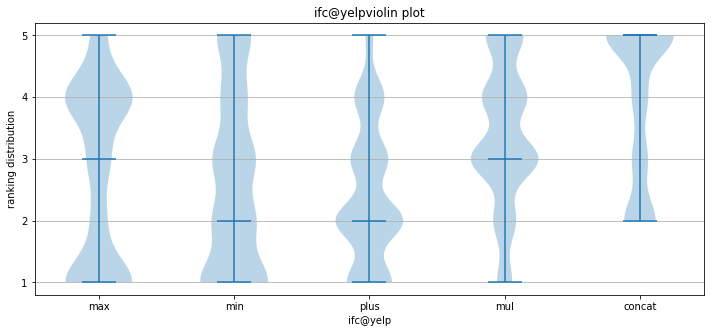

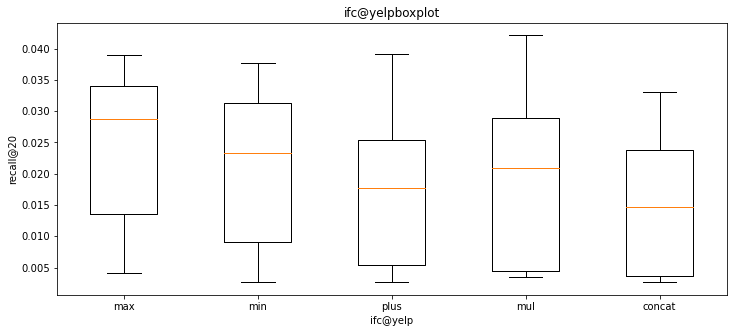

In [8]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc

curr_dataset = 'yelp'
data_type = 'implicit'
ifc_list0 = CF_IFC
# _list = [str(float(lr)) for ifc in ifc_list0]
ifc_dicts = dict()
ifcgroups = [[] for item in ifc_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset+"_perf_dict0.json")
# filename = os.path.join('save',"random_nas_"+ curr_dataset+'_'+data_type +"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_ifc = sample_arch_cf_ifc('max')

for arch_cf in arch_cf_list_ifc:
    # ifc_tmp = [[] for item in ifc_list0]
    for ifc in ifc_list0:
        ifc_idx = ifc_list0.index(ifc)
        arch_cf['ifc'] = ifc
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        ifcgroups[ifc_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
ifcgroups = np.array(ifcgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

ifcgroups = ifcgroups.reshape(len(ifc_list0), int(25*SPACE/len(ifc_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(ifc_list0)
ifcgroups = ifcgroups[:lr_hp_num,:]
ifcranks = get_rank_from_score(ifcgroups)
print("ranks.shape: {}".format(ifcranks.shape))
ifc_srcc = get_srcc_from_rank(groups=ifcgroups, ranks=ifcranks, optslist=ifc_list0[:lr_hp_num])
print("ifc_srcc: {:.4}".format(ifc_srcc))


fig = violin_plot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_boxplot_'+curr_dataset)))



### Ranking Distribution in ml-1m


ranks.shape: (675, 5)
ifc_srcc: 0.7409


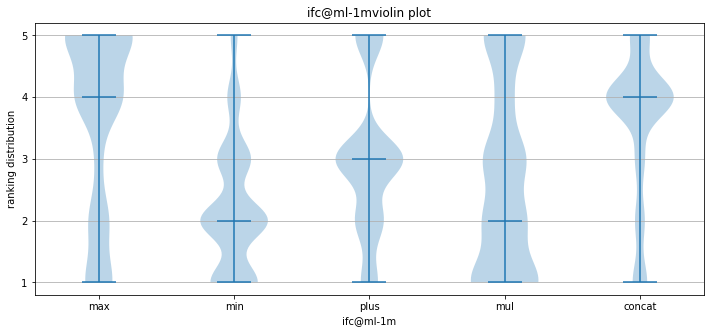

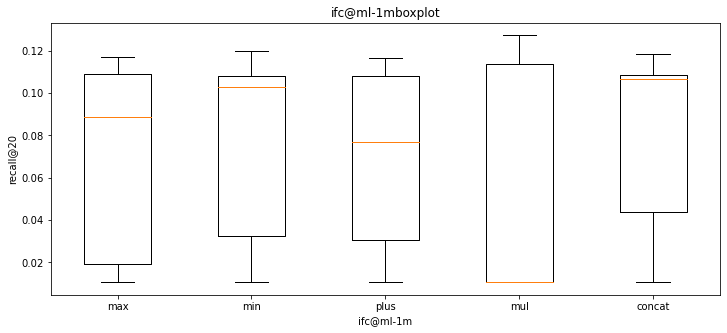

In [9]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc

curr_dataset = 'ml-1m'
data_type = 'implicit'
ifc_list0 = CF_IFC
# _list = [str(float(lr)) for ifc in ifc_list0]
ifc_dicts = dict()
ifcgroups = [[] for item in ifc_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset+"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_ifc = sample_arch_cf_ifc('max')

for arch_cf in arch_cf_list_ifc:
    # ifc_tmp = [[] for item in ifc_list0]
    for ifc in ifc_list0:
        ifc_idx = ifc_list0.index(ifc)
        arch_cf['ifc'] = ifc
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        ifcgroups[ifc_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
ifcgroups = np.array(ifcgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

ifcgroups = ifcgroups.reshape(5,27*25)
# print(ifcgroups.shape)
lr_hp_num = 5
ifcgroups = ifcgroups[:lr_hp_num,:]
ifcranks = get_rank_from_score(ifcgroups)
print("ranks.shape: {}".format(ifcranks.shape))
ifc_srcc = get_srcc_from_rank(groups=ifcgroups, ranks=ifcranks, optslist=ifc_list0[:lr_hp_num])
print("ifc_srcc: {:.4}".format(ifc_srcc))


fig = violin_plot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_boxplot_'+curr_dataset)))


ranks.shape: (675, 5)
ifc_srcc: 0.7265


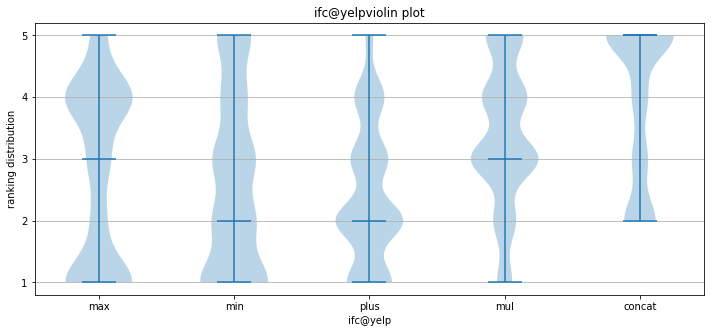

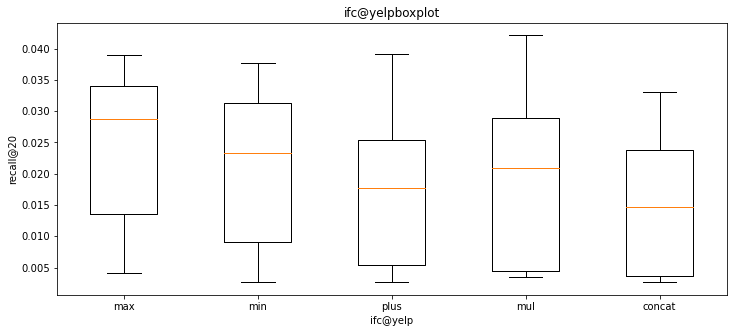

In [10]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc

curr_dataset = 'yelp'
data_type = 'implicit'
ifc_list0 = CF_IFC
ifc_dicts = dict()
ifcgroups = [[] for item in ifc_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset+"_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_ifc = sample_arch_cf_ifc('max')

for arch_cf in arch_cf_list_ifc:
    # ifc_tmp = [[] for item in ifc_list0]
    for ifc in ifc_list0:
        ifc_idx = ifc_list0.index(ifc)
        arch_cf['ifc'] = ifc
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        ifcgroups[ifc_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# ifcgroup2 = ifcgroups.copy()
ifcgroups = np.array(ifcgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

ifcgroups = ifcgroups.reshape(5,27*25)
# print(ifcgroups.shape)
lr_hp_num = 5
ifcgroups = ifcgroups[:lr_hp_num,:]
ifcranks = get_rank_from_score(ifcgroups)
print("ranks.shape: {}".format(ifcranks.shape))
ifc_srcc = get_srcc_from_rank(groups=ifcgroups, ranks=ifcranks, optslist=ifc_list0[:lr_hp_num])
print("ifc_srcc: {:.4}".format(ifc_srcc))


fig = violin_plot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=ifcgroups, xlabel=ifc_list0[:lr_hp_num], figtitle='ifc@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('ifc_boxplot_'+curr_dataset)))

# Pred

ranks.shape: (1125, 3)
pred_srcc: 0.532


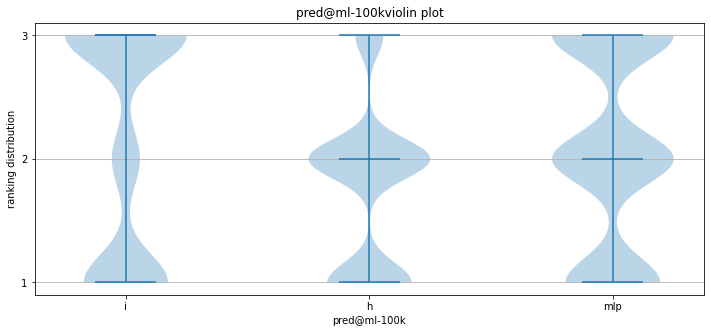

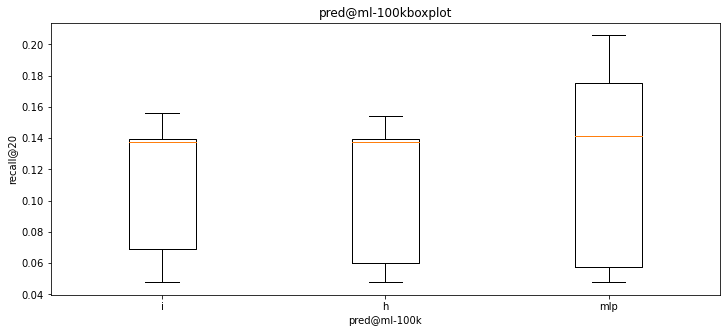

In [11]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc, sample_arch_cf_pred

curr_dataset = 'ml-100k'
data_type = 'implicit'
pred_list0 = CF_PRED
pred_dicts = dict()
predgroups = [[] for item in pred_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset + '_' + data_type + "_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

# HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_pred = sample_arch_cf_pred(pred_mode='i')

for arch_cf in arch_cf_list_pred:
    for pred in pred_list0:
        pred_idx = pred_list0.index(pred)
        arch_cf['pred'] = pred
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        predgroups[pred_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
predgroups = np.array(predgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

predgroups = predgroups.reshape(len(pred_list0), int(25*SPACE/len(pred_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(pred_list0)
predgroups = predgroups[:lr_hp_num,:]
predranks = get_rank_from_score(predgroups)
print("ranks.shape: {}".format(predranks.shape))
pred_srcc = get_srcc_from_rank(groups=predgroups, ranks=predranks, optslist=pred_list0[:lr_hp_num])
print("pred_srcc: {:.4}".format(pred_srcc))


fig = violin_plot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_boxplot_'+curr_dataset)))

ranks.shape: (1125, 3)
pred_srcc: 0.5294


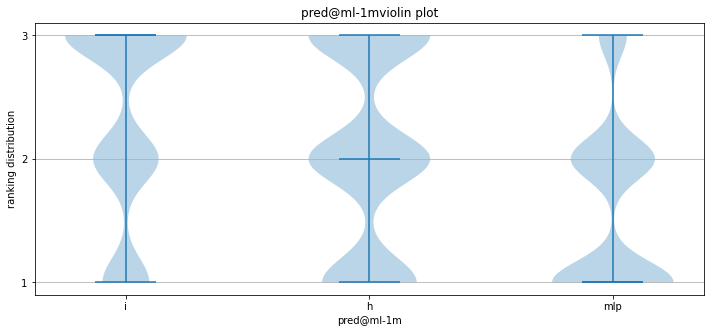

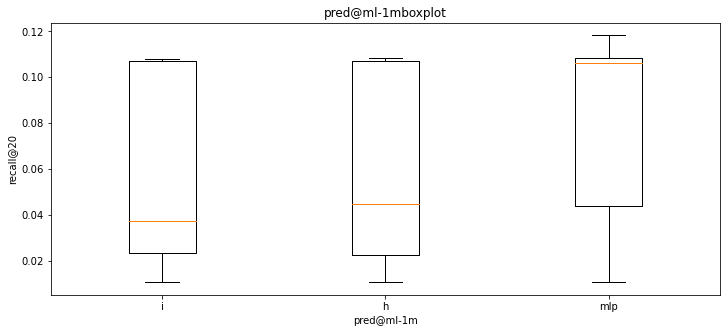

In [12]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc, sample_arch_cf_pred

curr_dataset = 'ml-1m'
data_type = 'implicit'
pred_list0 = CF_PRED
pred_dicts = dict()
predgroups = [[] for item in pred_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset + "_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

# HP_SPACE = 16
# ifc_model_group = np.zeros(shape=(len))
arch_cf_list_pred = sample_arch_cf_pred(pred_mode='i')

for arch_cf in arch_cf_list_pred:
    for pred in pred_list0:
        pred_idx = pred_list0.index(pred)
        arch_cf['pred'] = pred
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        predgroups[pred_idx].append(group_i_tmp)


from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
predgroups = np.array(predgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10

predgroups = predgroups.reshape(len(pred_list0), int(25*SPACE/len(pred_list0)))
# print(ifcgroups.shape)
lr_hp_num = len(pred_list0)
predgroups = predgroups[:lr_hp_num,:]
predranks = get_rank_from_score(predgroups)
print("ranks.shape: {}".format(predranks.shape))
pred_srcc = get_srcc_from_rank(groups=predgroups, ranks=predranks, optslist=pred_list0[:lr_hp_num])
print("pred_srcc: {:.4}".format(pred_srcc))


fig = violin_plot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_boxplot_'+curr_dataset)))

(3, 1125)
ranks.shape: (1125, 3)
pred_srcc: 0.1609


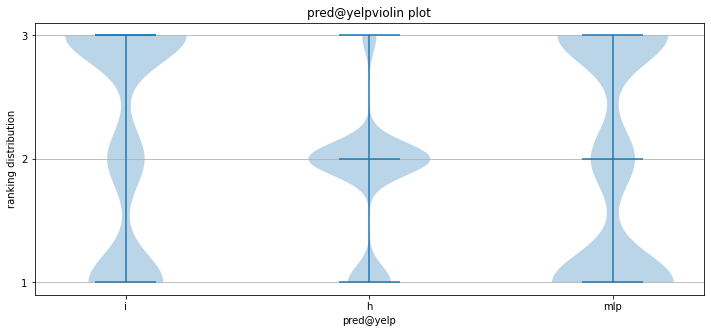

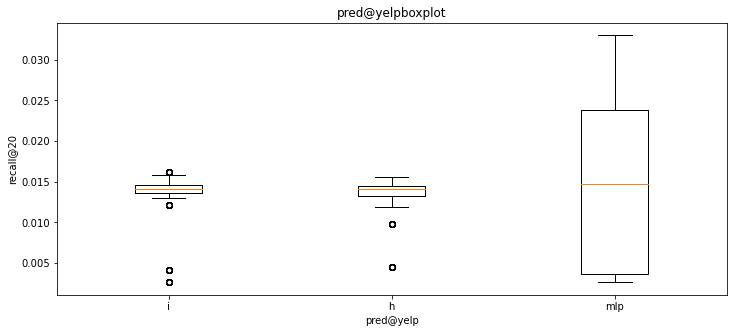

In [13]:
import json 
from utils import violin_plot
from models import CF_MODEL, CF_EMB, CF_IFC, CF_PRED, SPACE
from controller import sample_arch_cf, sample_arch_cf_ifc, sample_arch_cf_pred
from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank

curr_dataset = 'yelp'
data_type = 'implicit'
pred_list0 = CF_PRED
pred_dicts = dict()
predgroups = [[] for item in pred_list0]#np.array(, dtype='str')

filename = os.path.join('save',"random_nas_"+ curr_dataset + "_perf_dict0.json")
with open(filename,'r', encoding='UTF-8') as infile:
    load_dict_tmp = json.load(infile)

for k in load_dict_tmp:
    load_dict_tmp[k] = np.array(load_dict_tmp[k])

arch_cf_list_pred = sample_arch_cf_pred(pred_mode='i')
for arch_cf in arch_cf_list_pred:
    for pred in pred_list0:
        pred_idx = pred_list0.index(pred)
        arch_cf['pred'] = pred
        group_i_tmp = load_dict_tmp[str(arch_cf)]
        # print(group_i_tmp)
        predgroups[pred_idx].append(group_i_tmp)



# print(np.array(predgroups).shape) # (3, 45, 25, 2)

predgroups = np.array(predgroups)[:,:,:,0] # recall@20
# ifcgroups = np.array(ifcgroups)[:,:,:,1] # recall@10
predgroups = predgroups.reshape(len(pred_list0), int(25*SPACE/len(pred_list0)))
print(predgroups.shape)

lr_hp_num = len(pred_list0)
predgroups = predgroups[:lr_hp_num,:]
predranks = get_rank_from_score(predgroups)
print("ranks.shape: {}".format(predranks.shape))
pred_srcc = get_srcc_from_rank(groups=predgroups, ranks=predranks, optslist=pred_list0[:lr_hp_num])
print("pred_srcc: {:.4}".format(pred_srcc))


fig = violin_plot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=predgroups, xlabel=pred_list0[:lr_hp_num], figtitle='pred@{}'.format(curr_dataset))
fig.savefig(os.path.join('box_violin_plot', os.path.join('pred_boxplot_'+curr_dataset)))

In [ ]:
predgroups[0][0]

array([[0.14545725, 0.08143606],
       [0.13834219, 0.08003138],
       [0.12326837, 0.06976222],
       [0.14765607, 0.08004538],
       [0.13800437, 0.07768336],
       [0.0476458 , 0.02868812],
       [0.15105448, 0.08810025],
       [0.13826073, 0.08030517],
       [0.13804278, 0.07886828],
       [0.15639837, 0.08977646],
       [0.10341196, 0.0576619 ],
       [0.09402238, 0.0574116 ],
       [0.05729434, 0.03735048],
       [0.05603634, 0.03617046],
       [0.0835006 , 0.04905648],
       [0.0476458 , 0.02868812]])